<a href="https://colab.research.google.com/github/android-kunjapppan/PyTorch-Tutorial/blob/master/PyTorch_Softmax_Cross_Entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Softmax:

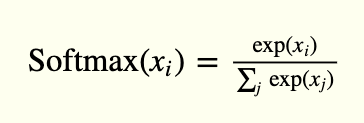



* Splashes the o/p to be between 0 - 1
* It shows the probabilities of the outputs
* Sum of these probs will give us 1

In [41]:
import numpy as np
import torch

def softmax(x):
  return np.exp(x)/np.sum(np.exp(x),axis = 0)

x = np.array([2.0,1.0,0.1])
outputs = softmax(x)
print('softmax numpy:',outputs)

softmax numpy: [0.65900114 0.24243297 0.09856589]


In [42]:
# Using Pytorch
x= torch.tensor([2.0,1.0,0.1])
outputs = torch.softmax(x,dim =0)
print('softmax torch:',outputs)

softmax torch: tensor([0.6590, 0.2424, 0.0986])


# Cross-Entropy Loss:
* Measures the performance of a classification Model
* USed in Multi Class Problems
* Should not use **Softmax** at the end
* Better our prediction the lower the loss
* Bad Prediction --> High Loss
* The Label must be One-Hot Encoded


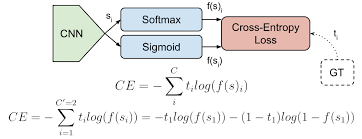

In [43]:
def cross_entropy(actual,pred):
  loss = -np.sum(actual*np.log(pred))
  return loss

Y= np.array([1,0,0])

# y_pred has probabilities which are calculated using softmax
y_pred_good = np.array([0.7,0.2,0.1])
y_pred_bad = np.array([0.1,0.3,0.6])

l1 = cross_entropy(Y,y_pred_good)
l2 = cross_entropy(Y,y_pred_bad)

print('Loss1 numpy',l1)
print('Loss2 numpy',l2) # Loss2 will be more as it is a bad prediction

Loss1 numpy 0.35667494393873245
Loss2 numpy 2.3025850929940455


In [45]:
# Using Pytorch
import torch.nn as nn

loss = nn.CrossEntropyLoss()

Y= torch.tensor([0]) # Not One-hot Encoded

# Size will be n_samples x n_classes (for eg., 1x3)
y_pred_good = torch.tensor([[2.0,1.0,0.1]])
y_pred_bad = torch.tensor([[0.5,2.0,0.3]])

l1 = loss(y_pred_good,Y)
l2 = loss(y_pred_bad,Y)


print(l1.item())
print(l2.item())

0.4170299470424652
1.840616226196289


In [46]:
# To get the class class labels
# _ because we dont want that value
_, predictions1 = torch.max(y_pred_good,1)
_, predictions2 = torch.max(y_pred_bad,1)

print(predictions1)
print(predictions2)

tensor([0])
tensor([1])


# nn.BCELoss

* Binary Cross Entropy loss
* Here we must use sigmoid function at the end 
      y = nn.sigmoid(out)